In [1]:
!pip install torch torchvision matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/My\ Drive


'10,000 words to make insulin.gdoc'
 20181001_102053_edited.mp4
 2022.gslides
'3: Clutter.gslides'
 7-20-20
 8-10-20
 8-24-20
 8-3-20.pdf
'9 12 24.gdoc'
'9 9 24.gdoc'
'abstract 1-persepolis .gdoc'
'abstract 2- the subject of freedom.gdoc'
 africana1.gdoc
'africana final.gdoc'
 africanastudies1.gdoc
 Aimee.gdoc
'AI trading bot.gdoc'
 algointro.gdoc
'amazon fba guide.gdoc'
'Annotated Bibliography.gdoc'
'Annotated bib- social media.gdoc'
 art.gdoc
'art printouts.gdoc'
'assignment 4.gdoc'
 assignment5database.gdoc
'aws cloudfront and aws global accelerator.gdoc'
'aws example use cases.gdoc'
'AWS High availability and scalability:ELB and ASG.gdoc'
'AWS pt 2 EC2 continued.gdoc'
'aws rds and aurora.gdoc'
'aws route 53.gdoc'
'aws s3.gdoc'
'aws section 17: decoupling applications: sqs, sns, .gdoc'
'aws section 18: containers- ECS, Fargate, ECR & EKS.gdoc'
'aws snow family.gdoc'
 bib.gdoc
'bio citation.gdoc'
 bio.gdoc
'bio human .gdoc'
 biology.gdoc
'Biology Unit 1.gdoc'
'bio sheet.gdoc'
'biotec

In [4]:
!ls /content/drive/My\ Drive/dataset.zip

'/content/drive/My Drive/dataset.zip'


In [5]:
dataset_path = '/content/drive/My Drive/dataset.zip'
# Unzip the downloaded dataset
!unzip dataset.zip -d /content/drive/My Drive/dataset.zip


unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


In [6]:
!unzip /content/drive/My\ Drive/dataset.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/5/00005_00053_00010.png  
  inflating: /content/dataset/train/5/00005_00053_00011.png  
  inflating: /content/dataset/train/5/00005_00053_00012.png  
  inflating: /content/dataset/train/5/00005_00053_00013.png  
  inflating: /content/dataset/train/5/00005_00053_00014.png  
  inflating: /content/dataset/train/5/00005_00053_00015.png  
  inflating: /content/dataset/train/5/00005_00053_00016.png  
  inflating: /content/dataset/train/5/00005_00053_00017.png  
  inflating: /content/dataset/train/5/00005_00053_00018.png  
  inflating: /content/dataset/train/5/00005_00053_00019.png  
  inflating: /content/dataset/train/5/00005_00053_00020.png  
  inflating: /content/dataset/train/5/00005_00053_00021.png  
  inflating: /content/dataset/train/5/00005_00053_00022.png  
  inflating: /content/dataset/train/5/00005_00053_00023.png  
  inflating: /content/dataset/train/5/00005_00053_00024.png  
  inflating: /conte

In [11]:
from torch.utils.data import Dataset
from PIL import Image

class TrafficSignDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)  # Load the CSV file
        self.root_dir = root_dir  # Directory containing the images
        self.transform = transform  # Image transformations

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Get the image path and label
        img_path = f"{self.root_dir}/{self.annotations.iloc[idx, -1]}"  # Last column: Path
        label = int(self.annotations.iloc[idx, -2])  # Second-to-last column: ClassId

        # Load the image
        image = Image.open(img_path).convert("RGB")  # Ensure 3-channel RGB

        # Apply transformations (if provided)
        if self.transform:
            image = self.transform(image)

        return image, label


In [7]:
!ls /content/dataset

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


In [12]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize all images to 32x32
    transforms.ToTensor(),       # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize values to [-1, 1]
])


In [9]:
!ls /content/dataset/train
!ls /content/dataset/test


0  10  12  14  16  18  2   21  23  25  27  29  30  32  34  36  38  4   41  5  7  9
1  11  13  15  17  19  20  22  24  26  28  3   31  33  35  37  39  40  42  6  8
00000.png  01579.png  03158.png  04737.png  06316.png  07895.png  09474.png  11053.png
00001.png  01580.png  03159.png  04738.png  06317.png  07896.png  09475.png  11054.png
00002.png  01581.png  03160.png  04739.png  06318.png  07897.png  09476.png  11055.png
00003.png  01582.png  03161.png  04740.png  06319.png  07898.png  09477.png  11056.png
00004.png  01583.png  03162.png  04741.png  06320.png  07899.png  09478.png  11057.png
00005.png  01584.png  03163.png  04742.png  06321.png  07900.png  09479.png  11058.png
00006.png  01585.png  03164.png  04743.png  06322.png  07901.png  09480.png  11059.png
00007.png  01586.png  03165.png  04744.png  06323.png  07902.png  09481.png  11060.png
00008.png  01587.png  03166.png  04745.png  06324.png  07903.png  09482.png  11061.png
00009.png  01588.png  03167.png  04746.png  06325.png 

In [10]:
import pandas as pd

# Load the CSV files
train_csv = pd.read_csv('/content/dataset/Train.csv')
test_csv = pd.read_csv('/content/dataset/Test.csv')

# Display the first few rows
print(train_csv.head())
print(test_csv.head())


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      5

In [13]:
# Paths to CSV files and image directories
train_csv_path = '/content/dataset/Train.csv'
test_csv_path = '/content/dataset/Test.csv'
train_root = '/content/dataset'
test_root = '/content/dataset'

# Create datasets
train_dataset = TrafficSignDataset(csv_file=train_csv_path, root_dir=train_root, transform=transform)
test_dataset = TrafficSignDataset(csv_file=test_csv_path, root_dir=test_root, transform=transform)

# Create data loaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


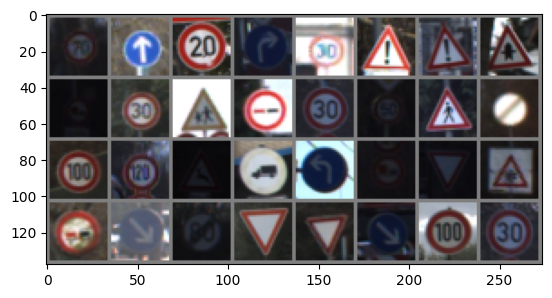

Labels: tensor([ 4, 35,  0, 33,  1, 18, 18, 11, 10,  1, 28,  9,  1,  2, 27, 32,  7,  8,
        31, 16, 34, 10, 13, 30,  9, 38,  6, 13, 13, 38,  7,  1])


In [15]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)


In [16]:
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes=43):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [20]:
from torchvision.models import resnet50

# Load ResNet50 with pretrained weights
resnet = resnet50(pretrained=True)

# Modify the final fully connected layer to match the number of classes (43)
resnet.fc = nn.Linear(resnet.fc.in_features, 43)

# Freeze all layers except the final ones
for param in resnet.parameters():
    param.requires_grad = False
for param in resnet.fc.parameters():
    param.requires_grad = True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.8MB/s]


In [21]:
from torchvision.models import vgg16

# Load VGG16 with pretrained weights
vgg = vgg16(pretrained=True)

# Modify the final fully connected layer to match the number of classes (43)
vgg.classifier[6] = nn.Linear(vgg.classifier[6].in_features, 43)

# Freeze all layers except the final classifier layers
for param in vgg.features.parameters():
    param.requires_grad = False
for param in vgg.classifier.parameters():
    param.requires_grad = True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 111MB/s] 


In [22]:
def train_model(model, train_loader, num_epochs=10):
    model.train()
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    return train_losses, train_accuracies

In [23]:
# Train CustomCNN
customcnn_losses, customcnn_accuracies = train_model(model, train_loader, num_epochs=10)

# Train ResNet50
optimizer = optim.Adam(resnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
resnet_losses, resnet_accuracies = train_model(resnet, train_loader, num_epochs=10)

# Train VGG16
optimizer = optim.Adam(vgg.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
vgg_losses, vgg_accuracies = train_model(vgg, train_loader, num_epochs=10)


KeyboardInterrupt: 

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Evaluate the model
evaluate_model(model, test_loader)


In [ ]:
# Evaluate CustomCNN
print("Evaluating CustomCNN...")
evaluate_model(model, test_loader)

# Evaluate ResNet50
print("Evaluating ResNet50...")
evaluate_model(resnet, test_loader)

# Evaluate VGG16
print("Evaluating VGG16...")
evaluate_model(vgg, test_loader)


In [ ]:
import matplotlib.pyplot as plt

def plot_training_metrics(losses, accuracies, model_name):
    epochs = range(1, len(losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, losses, label=f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Training Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracies, label=f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Training Accuracy')
    plt.legend()

    plt.show()

# Plot for CustomCNN
plot_training_metrics(customcnn_losses, customcnn_accuracies, 'CustomCNN')

# Plot for ResNet50
plot_training_metrics(resnet_losses, resnet_accuracies, 'ResNet50')

# Plot for VGG16
plot_training_metrics(vgg_losses, vgg_accuracies, 'VGG16')
